# UTS Deep Learning - Klasifikasi Angka (NIM 124)
**Nama:** Lulu El Maknun

**NIM:** 202332124

In [21]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
from google.colab import drive

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


Data MNIST siap. Input shape: (60000, 28, 28, 1)


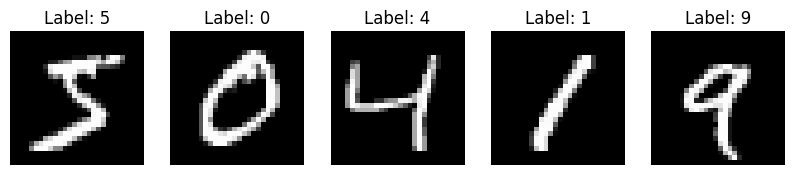

In [23]:
# Load dan Pre-process Dataset MNIST untuk Model A
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi & Reshape
x_train_A = x_train.astype('float32') / 255.0
x_test_A = x_test.astype('float32') / 255.0

# Tambahkan dimensi channel (1) untuk input CNN
x_train_A = np.expand_dims(x_train_A, -1)
x_test_A = np.expand_dims(x_test_A, -1)

# One-Hot Encoding Label
num_classes = 10
y_train_cat_A = to_categorical(y_train, num_classes)
y_test_cat_A = to_categorical(y_test, num_classes)

print(f"Data MNIST siap. Input shape: {x_train_A.shape}")

# Visualisasi 5 Contoh Citra MNIST
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Mounted at /content/drive

Total citra tulisan tangan: 30

Visualisasi 5 citra tulisan tangan:


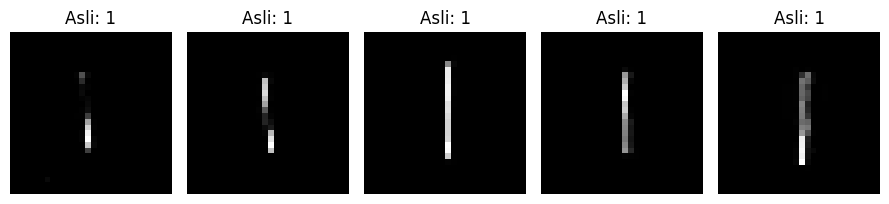

In [25]:
# Load Tulisan Tangan (SEBELUM melatih model)
drive.mount('/content/drive', force_remount=True)

NIM_DIGITS = [1, 2, 4]
FOLDER_TULISAN_TANGAN = '/content/drive/MyDrive/UTS_tulisan_tangan'
image_files = sorted(glob.glob(os.path.join(FOLDER_TULISAN_TANGAN, "angka_*.jpg")))

processed_images_A_handwritten = []
true_labels_A_handwritten = []
IMAGE_SIZE = (28, 28)

# Pra-pemrosesan Citra Tulisan Tangan
for path in image_files:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = 255 - img  # Inversi warna
    img = cv2.resize(img, IMAGE_SIZE)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, -1)

    try:
        label = int(os.path.basename(path).split('_')[1])
        if label in NIM_DIGITS:
            processed_images_A_handwritten.append(img)
            true_labels_A_handwritten.append(label)
    except:
        continue

processed_images_A_handwritten = np.array(processed_images_A_handwritten)
true_labels_A_handwritten = np.array(true_labels_A_handwritten)
total_A_handwritten = len(true_labels_A_handwritten)

print(f"\nTotal citra tulisan tangan: {total_A_handwritten}")

# Visualisasi Tulisan Tangan
if total_A_handwritten > 0:
    plt.figure(figsize=(9, 3))
    print(f"\nVisualisasi {min(5, total_A_handwritten)} citra tulisan tangan:")
    for i in range(min(5, total_A_handwritten)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(processed_images_A_handwritten[i].squeeze(), cmap='gray')
        plt.title(f"Asli: {true_labels_A_handwritten[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Ringkasan Model A:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Memulai Pelatihan Model A...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8168 - loss: 0.5849 - val_accuracy: 0.9819 - val_loss: 0.0570
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9716 - loss: 0.0985 - val_accuracy: 0.9878 - val_loss: 0.0363
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0682 - val_accuracy: 0.9889 - val_loss: 0.0342
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9905 - val_loss: 0.0276
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.9904 - val_loss: 0.0286
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9911 - val_loss: 0.0256
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9910 - val_loss: 0.0275
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9903 - 

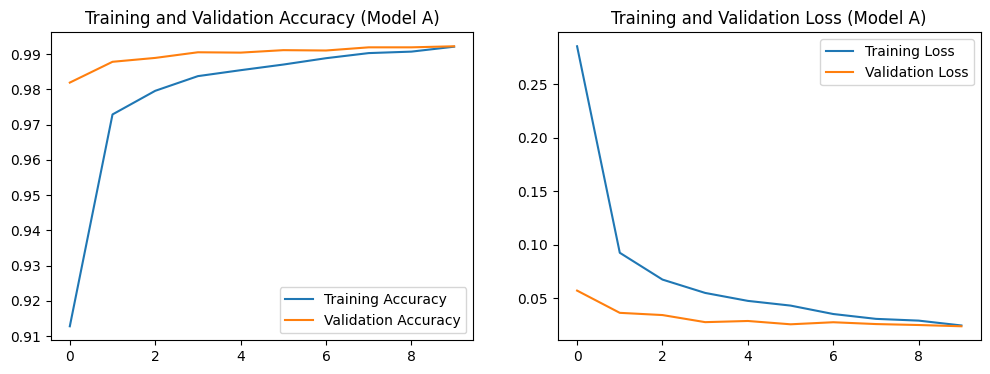

In [26]:
# Bangun dan Latih Model A
model_A = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

print("Ringkasan Model A:")
model_A.summary()

model_A.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nMemulai Pelatihan Model A...")
history_A = model_A.fit(
    x_train_A, y_train_cat_A,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_A, y_test_cat_A),
    verbose=1
)
print("Pelatihan Model A selesai.")

model_A.save('model_A_cnn_scratch.keras')

_, global_accuracy_A_test = model_A.evaluate(x_test_A, y_test_cat_A, verbose=0)
print(f"\nModel A Akurasi di Test Set MNIST: {global_accuracy_A_test*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'], label='Training Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model A)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'], label='Training Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model A)')
plt.legend()
plt.show()

In [27]:
# Evaluasi Model A pada Tulisan Tangan
if total_A_handwritten > 0:
    predictions_A = model_A.predict(processed_images_A_handwritten, verbose=0)
    predicted_labels_A = np.argmax(predictions_A, axis=1)
    global_accuracy_A_handwritten = np.sum(predicted_labels_A == true_labels_A_handwritten) / total_A_handwritten * 100

    print("\n" + "=" * 50)
    print(f"AKURASI MODEL A pada TULISAN TANGAN: {global_accuracy_A_handwritten:.2f}%")
    print("=" * 50)
    print("\nSajian Hasil Prediksi Model A:")
    for i in range(total_A_handwritten):
        status = "Benar (✅)" if predicted_labels_A[i] == true_labels_A_handwritten[i] else "Salah (❌)"
        print(f"Citra ke-{i+1} (angka {true_labels_A_handwritten[i]}): Prediksi model: {predicted_labels_A[i]} ({status})")
else:
    global_accuracy_A_handwritten = 0.0
    print("\n❌ Tidak ada data tulisan tangan.")


AKURASI MODEL A pada TULISAN TANGAN: 96.67%

Sajian Hasil Prediksi Model A:
Citra ke-1 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-2 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-3 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-4 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-5 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-6 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-7 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-8 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-9 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-10 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-11 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-12 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-13 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-14 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-15 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-16 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-17 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-18 (angka 2): Prediksi

In [28]:
# Bangun Model B (Transfer Learning)
IMAGE_SIZE_VGG = (48, 48)

# Pra-pemrosesan MNIST untuk VGG16
x_train_B = np.stack((x_train,)*3, axis=-1)
x_test_B = np.stack((x_test,)*3, axis=-1)
x_train_B = tf.image.resize(x_train_B, IMAGE_SIZE_VGG)
x_test_B = tf.image.resize(x_test_B, IMAGE_SIZE_VGG)
x_train_B = x_train_B / 255.0
x_test_B = x_test_B / 255.0
y_train_cat_B = to_categorical(y_train, num_classes)
y_test_cat_B = to_categorical(y_test, num_classes)

# Bangun Model B
input_tensor = Input(shape=(48, 48, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_B = Model(inputs=base_model.input, outputs=output)

print("\nRingkasan Model B:")
model_B.summary()

model_B.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("\nMemulai Pelatihan Model B...")
history_B = model_B.fit(
    x_train_B, y_train_cat_B,
    validation_data=(x_test_B, y_test_cat_B),
    epochs=5,
    batch_size=64,
    verbose=1
)
print("Pelatihan Model B selesai.")

_, global_accuracy_B_test = model_B.evaluate(x_test_B, y_test_cat_B, verbose=0)
print(f"\nModel B Akurasi di Test Set MNIST: {global_accuracy_B_test*100:.2f}%")


Ringkasan Model B:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Memulai Pelatihan Model B...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.4807 - loss: 1.6060 - val_accuracy: 0.8708 - val_loss: 0.5668
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8397 - loss: 0.5847 - val_accuracy: 0.9140 - val_loss: 0.3514
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8885 - loss: 0.4001 - val_accuracy: 0.9317 - val_loss: 0.2635
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9125 - loss: 0.3073 - val_accuracy: 0.9410 - val_loss: 0.2186
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9260 - loss: 0.2604 - val_accuracy: 0.9476 - val_loss: 0.1865
Pelatihan Model B selesai.

Model B Akurasi di Test Set MNIST: 94.76%


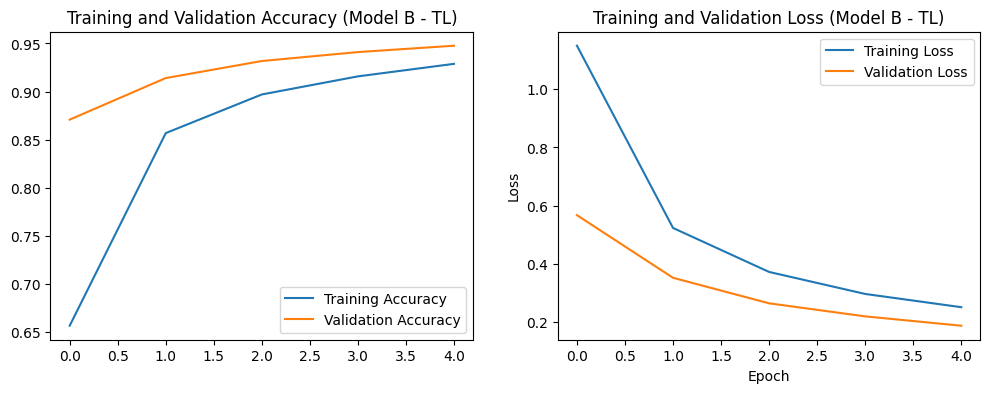

In [29]:
# Plot History Model B dan Evaluasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model B - TL)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'], label='Training Loss')
plt.plot(history_B.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model B - TL)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Evaluasi Model B pada Tulisan Tangan
if total_A_handwritten > 0:
    processed_images_B_final = []
    for img in processed_images_A_handwritten:
        img_2d = img.squeeze()
        img_resized = cv2.resize(img_2d, IMAGE_SIZE_VGG)
        img_rgb = np.stack((img_resized,)*3, axis=-1)
        processed_images_B_final.append(img_rgb)

    processed_images_B_final = np.array(processed_images_B_final)

    predictions_B = model_B.predict(processed_images_B_final, verbose=0)
    predicted_labels_B = np.argmax(predictions_B, axis=1)

    correct_B_handwritten = np.sum(predicted_labels_B == true_labels_A_handwritten)
    global_accuracy_B_handwritten = correct_B_handwritten / total_A_handwritten * 100

    print("\n" + "=" * 60)
    print(f"AKURASI MODEL B (Transfer Learning) pada TULISAN TANGAN: {global_accuracy_B_handwritten:.2f}%")
    print("=" * 60)

    print("\nSajian Hasil Prediksi Model B:")
    for i in range(total_A_handwritten):
        status = "Benar (✅)" if predicted_labels_B[i] == true_labels_A_handwritten[i] else "Salah (❌)"
        print(f"Citra ke-{i+1} (angka {true_labels_A_handwritten[i]}): Prediksi model: {predicted_labels_B[i]} ({status})")
else:
    global_accuracy_B_handwritten = 0.0
    print("\n❌ Tidak ada data tulisan tangan.")


AKURASI MODEL B (Transfer Learning) pada TULISAN TANGAN: 90.00%

Sajian Hasil Prediksi Model B:
Citra ke-1 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-2 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-3 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-4 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-5 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-6 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-7 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-8 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-9 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-10 (angka 1): Prediksi model: 1 (Benar (✅))
Citra ke-11 (angka 2): Prediksi model: 7 (Salah (❌))
Citra ke-12 (angka 2): Prediksi model: 7 (Salah (❌))
Citra ke-13 (angka 2): Prediksi model: 3 (Salah (❌))
Citra ke-14 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-15 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-16 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-17 (angka 2): Prediksi model: 2 (Benar (✅))
Citra ke-18

In [31]:
# Ringkasan Akhir
print("\n" + "=" * 60)
print(" RINGKASAN AKURASI FINAL ")
print("=" * 60)
print(f"Model A (CNN dari Nol) - Akurasi Tulisan Tangan: {global_accuracy_A_handwritten:.2f}%")
print(f"Model B (Transfer Learning) - Akurasi Tulisan Tangan: {global_accuracy_B_handwritten:.2f}%")
print("-" * 60)


 RINGKASAN AKURASI FINAL 
Model A (CNN dari Nol) - Akurasi Tulisan Tangan: 96.67%
Model B (Transfer Learning) - Akurasi Tulisan Tangan: 90.00%
------------------------------------------------------------
